In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
from datetime import datetime

# Set seaborn style and matplotlib configurations
sns.set_style("whitegrid")  # This replaces plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline

# Optional: Set figure size defaults
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [105]:


# Read the CSV file
df = pd.read_csv('../data/modern_english_books.csv')

# Display column names
print("Available columns in the dataset:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst few rows of data:")
print(df.head())

Available columns in the dataset:
['title', 'author_name', 'first_publish_year', 'subject', 'cover_i', 'subject_count', 'decade']

First few rows of data:
                                               title  \
0                              Butterflies and Moths   
1  "The work of the Committee of the institution ...   
2                    Garbage--the crisis of the 80's   
3  Preston Lee's 2-In-1 Book Series! Beginner Eng...   
4                                                  .   

                                         author_name  first_publish_year  \
0                             Dorothy Hinshaw Patent                1979   
1                             Stephen Mitchell Dixon                1930   
2  California Solid Waste Management Board. Offic...                1982   
3                                    Matthew Preston                2020   
4                                                NaN                1992   

                                             subjec

In [3]:
# Examine the publishing volume data
print("Books published per decade:")
decade_counts = volume_trends.sort_index()
print(decade_counts)

# Optional: Calculate some statistics
print("\nPublishing volume statistics:")
print(f"Peak decade: {decade_counts.idxmax()} with {decade_counts.max():,} books")
print(f"Lowest decade: {decade_counts.idxmin()} with {decade_counts.min():,} books")
print(f"Average books per decade: {decade_counts.mean():,.0f}")

Books published per decade:


NameError: name 'volume_trends' is not defined

In [20]:
class LibraryDataAnalyzer:
    def __init__(self, file_path):
        """Initialize the analyzer with data file path."""
        self.df = self._load_and_clean_data(file_path)
        if self.df is None:
            raise ValueError("Failed to load data")
        print(f"Loaded {len(self.df)} records")
    
    def _load_and_clean_data(self, file_path):
        """Load and clean the dataset."""
        try:
            print(f"Loading data from {file_path}")
            df = pd.read_csv(file_path)
            print(f"Initial data shape: {df.shape}")
            
            df = self._clean_publication_years(df)
            print(f"After cleaning years: {df.shape}")
            
            df = self._clean_subjects(df)
            print(f"After cleaning subjects: {df.shape}")
            
            return df
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return None

    def _clean_publication_years(self, df):
        """Clean and validate publication years."""
        try:
            df['first_publish_year'] = pd.to_numeric(df['first_publish_year'], errors='coerce')
            
            current_year = 2022
            df = df[
                (df['first_publish_year'] >= 1900) & 
                (df['first_publish_year'] <= current_year)
            ]
            
            if 'decade' not in df.columns:
                df['decade'] = (df['first_publish_year'] // 10) * 10
            
            return df
        except Exception as e:
            print(f"Error cleaning years: {str(e)}")
            return None

    def _clean_subjects(self, df):
        """Clean and process subject/genre information."""
        try:
            print("Starting subject cleaning...")
            
            GENRE_MAPPING = {
                # Youth Literature
                'juvenile fiction': "Children's Literature",
                'children\'s fiction': "Children's Literature",
                'juvenile literature': "Children's Literature",
                'picture books': "Children's Literature",
                'middle grade': "Children's Literature",
                'children\'s stories': "Children's Literature",
                'children\'s books': "Children's Literature",
                
                # Young Adult
                'young adult fiction': "Young Adult Literature",
                'ya fiction': "Young Adult Literature",
                'teen fiction': "Young Adult Literature",
                'teen literature': "Young Adult Literature",
                
                # General Fiction
                'fiction': "Fiction",
                'novels': "Fiction",
                'short stories': "Fiction",
                
                'congresses': None,
                'proceedings': None,
                'dissertations': None
            }
            
            FORMAT_CATEGORIES = {
                'congresses',
                'proceedings',
                'periodicals',
                'dissertations',
                'papers',
                'reports',
                'abstracts',
                'indexes'
            }
            
            def clean_subject_list(subjects):
                if isinstance(subjects, str):
                    try:
                        subject_list = literal_eval(subjects)
                    except:
                        return []
                elif isinstance(subjects, list):
                    subject_list = subjects
                else:
                    return []
                    
                cleaned = []
                for subject in subject_list:
                    subject_lower = subject.lower().strip()
                    if any(format_cat in subject_lower for format_cat in FORMAT_CATEGORIES):
                        continue
                    mapped_subject = GENRE_MAPPING.get(subject_lower, subject)
                    if mapped_subject:
                        cleaned.append(mapped_subject)
                return list(set(cleaned))
            
            df['subjects_cleaned'] = df['subject'].apply(clean_subject_list)
            return df
            
        except Exception as e:
            print(f"Error in clean_subjects: {str(e)}")
            print(f"Current columns: {df.columns.tolist()}")
            raise

    # [Previous analysis methods remain the same]
    def analyze_publishing_volume(self):
        # [Previous implementation]
        pass

    def analyze_historical_events_impact(self):
        # [Previous implementation]
        pass

    def analyze_genre_trends(self):
        # [Previous implementation]
        pass

    def analyze_growth_rates(self):
        # [Previous implementation]
        pass

    def analyze_genre_diversity(self):
        # [Previous implementation]
        pass

    def analyze_filtered_genre_evolution(self):
        # [Previous implementation]
        pass

    def analyze_childrens_lit_trends(self, start_year=1990):
        """Analyze the evolution of children's literature specifically."""
        childrens_df = self.df[self.df['first_publish_year'] >= start_year].copy()
        childrens_df = childrens_df.explode('subjects_cleaned')
        
        # Filter for children's literature categories
        childrens_mask = childrens_df['subjects_cleaned'].str.contains("Children's Literature", na=False)
        childrens_data = childrens_df[childrens_mask].groupby('first_publish_year').size()
        
        # Calculate percentage of total books
        total_books = childrens_df.groupby('first_publish_year').size()
        percentage = (childrens_data / total_books * 100)
        
        # Create subplot with two charts
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Raw numbers plot
        ax1.plot(childrens_data.index, childrens_data.values, marker='o')
        ax1.set_title("Children's Literature Publication Volume", pad=20, fontsize=14)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Number of Books')
        ax1.grid(True, alpha=0.3)
        
        # Percentage plot
        ax2.plot(percentage.index, percentage.values, marker='o', color='orange')
        ax2.set_title("Children's Literature as Percentage of Total", pad=20, fontsize=14)
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Percentage of Total Books')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return childrens_data, percentage

    def visualize_genre_comparison(self, start_year=2000, top_n=5):
        """Compare growth rates of different genres."""
        modern_df = self.df[self.df['first_publish_year'] >= start_year].copy()
        modern_df = modern_df.explode('subjects_cleaned')
        
        # Get top genres
        top_genres = modern_df['subjects_cleaned'].value_counts().head(top_n).index
        
        # Calculate yearly percentages for each genre
        genre_trends = {}
        total_books = modern_df.groupby('first_publish_year').size()
        
        for genre in top_genres:
            genre_books = modern_df[modern_df['subjects_cleaned'] == genre].groupby('first_publish_year').size()
            genre_trends[genre] = (genre_books / total_books * 100)
        
        # Create heatmap data
        trend_df = pd.DataFrame(genre_trends)
        
        # Plot heatmap
        plt.figure(figsize=(15, 8))
        sns.heatmap(trend_df.T, cmap='YlOrRd', annot=True, fmt='.1f',
                    cbar_kws={'label': 'Percentage of Total Books'})
        
        plt.title('Genre Market Share Evolution', pad=20, fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Genre')
        plt.tight_layout()
        plt.show()
        
        return trend_df

    def analyze_genre_emergence(self, start_year=2000):
        """Track the emergence of new genres over time."""
        df_timeline = self.df[self.df['first_publish_year'] >= start_year].copy()
        df_timeline = df_timeline.explode('subjects_cleaned')
        
        # Count unique genres by year
        yearly_genres = df_timeline.groupby('first_publish_year')['subjects_cleaned'].nunique()
        cumulative_genres = pd.Series(index=yearly_genres.index)
        
        # Calculate cumulative unique genres
        seen_genres = set()
        for year in yearly_genres.index:
            year_genres = set(df_timeline[df_timeline['first_publish_year'] == year]['subjects_cleaned'].unique())
            seen_genres.update(year_genres)
            cumulative_genres[year] = len(seen_genres)
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Yearly unique genres
        ax1.plot(yearly_genres.index, yearly_genres.values, marker='o')
        ax1.set_title('Unique Genres per Year', pad=20, fontsize=14)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Number of Unique Genres')
        ax1.grid(True, alpha=0.3)
        
        # Cumulative genres
        ax2.plot(cumulative_genres.index, cumulative_genres.values, marker='o', color='green')
        ax2.set_title('Cumulative Unique Genres Over Time', pad=20, fontsize=14)
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Total Unique Genres')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return yearly_genres, cumulative_genres
    


Loading data from ../data/modern_english_books.csv
Initial data shape: (10000, 7)
After cleaning years: (10000, 7)
Starting subject cleaning...
After cleaning subjects: (10000, 8)
Loaded 10000 records
Analyzing Children's Literature Trends...


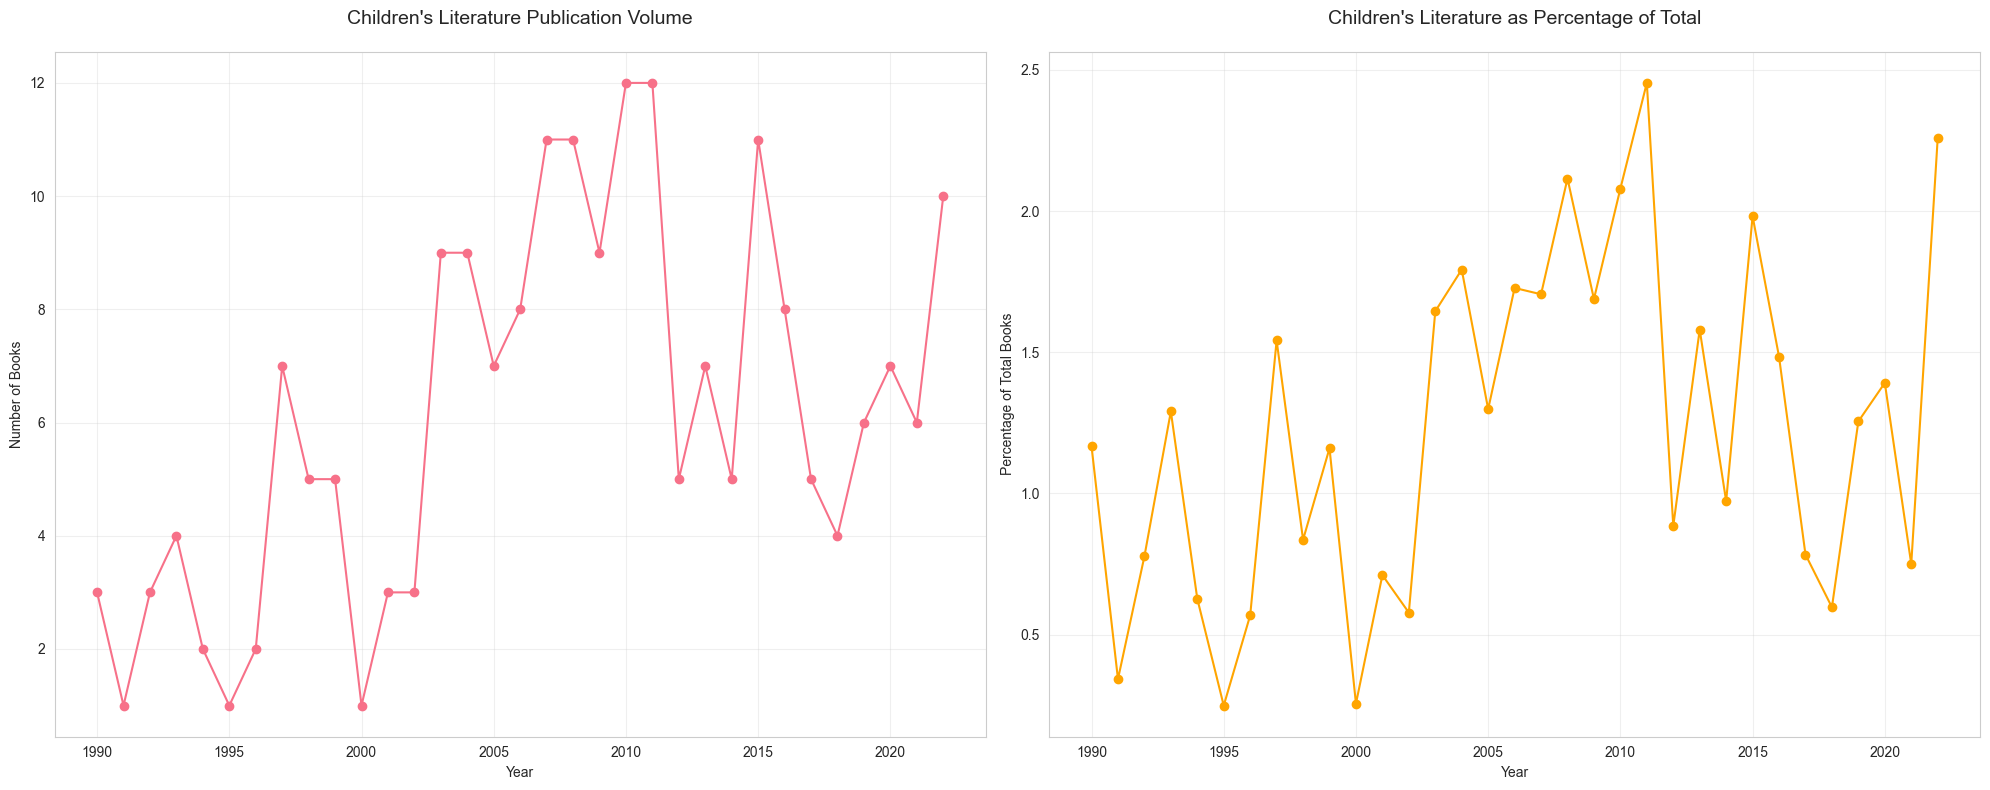


Visualizing Genre Comparison...


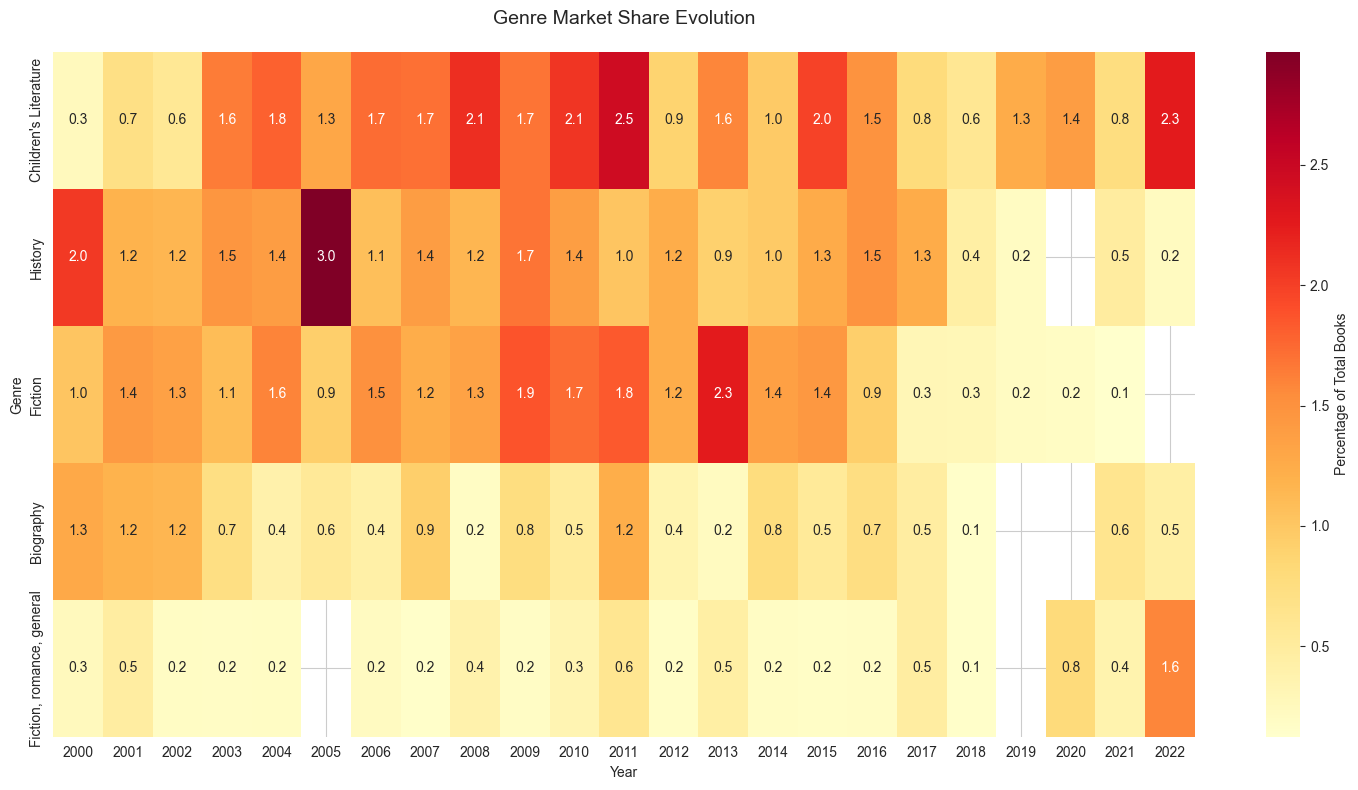


Analyzing Genre Emergence...


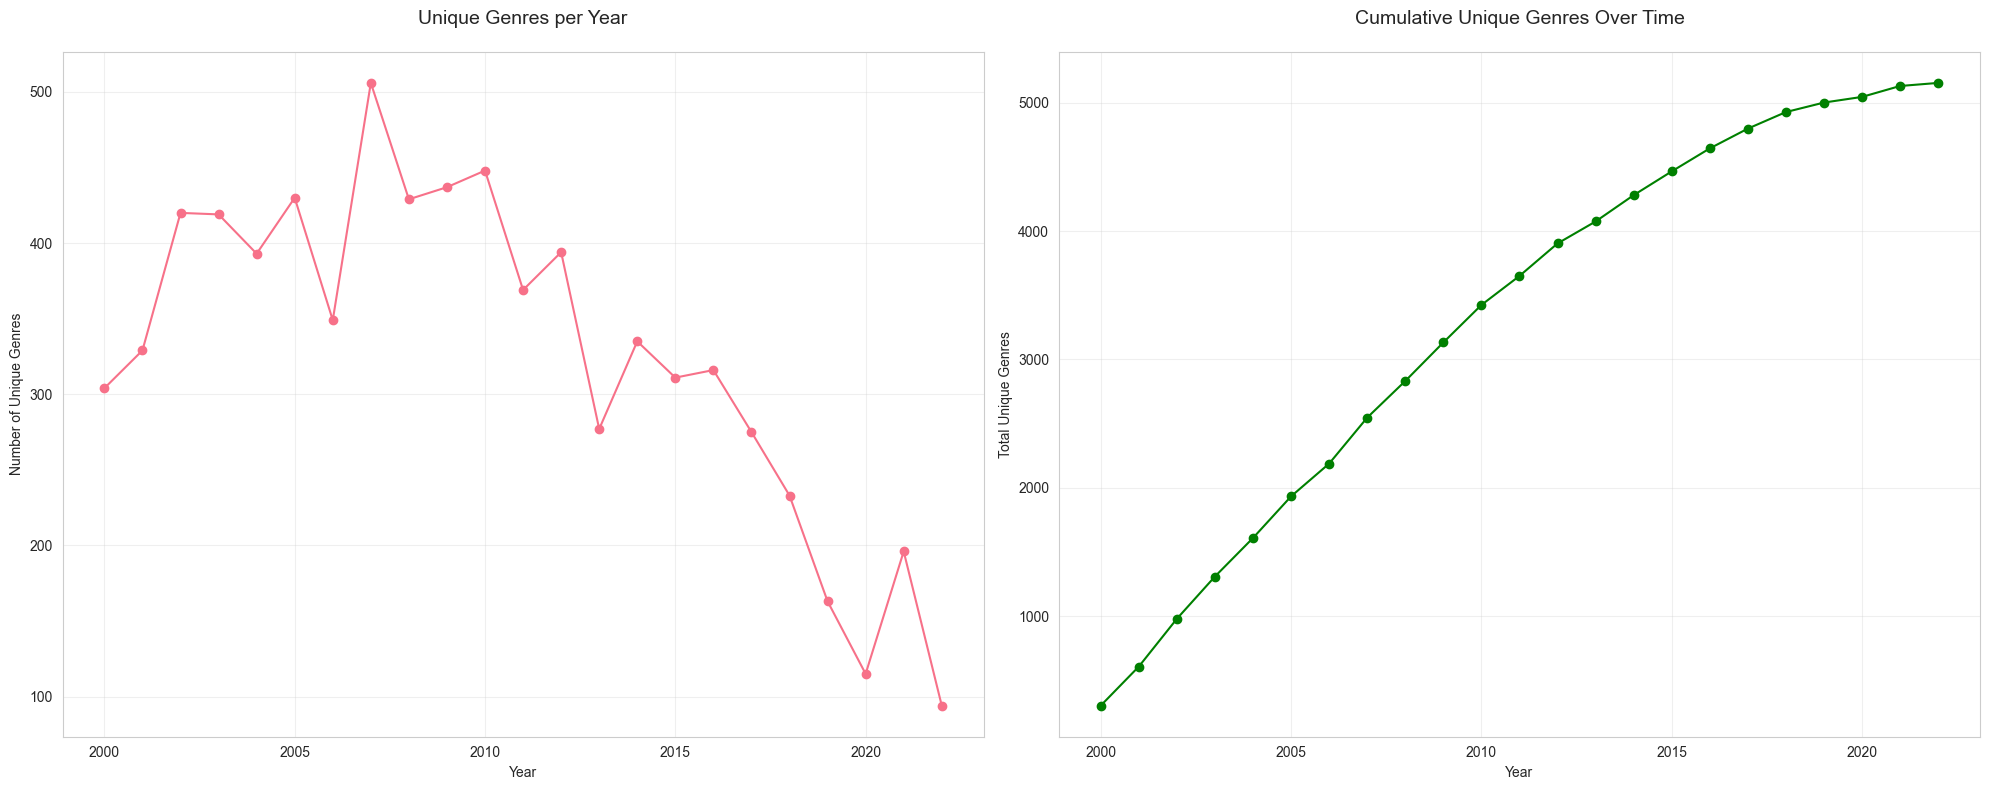


Key Findings:
Children's Literature peak percentage: 2.5% in 2011
Total unique genres by 2022: 5153.0


In [21]:
# Create analyzer instance
analyzer = LibraryDataAnalyzer('../data/modern_english_books.csv')

# Create visualizations
print("Analyzing Children's Literature Trends...")
childrens_trends, childrens_percentage = analyzer.analyze_childrens_lit_trends()

print("\nVisualizing Genre Comparison...")
genre_comparison = analyzer.visualize_genre_comparison()

print("\nAnalyzing Genre Emergence...")
yearly_genres, cumulative_genres = analyzer.analyze_genre_emergence()

# Print key findings
print("\nKey Findings:")
print(f"Children's Literature peak percentage: {childrens_percentage.max():.1f}% in {childrens_percentage.idxmax()}")
print(f"Total unique genres by 2022: {cumulative_genres.iloc[-1]}")